In [2]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from yahoo_finance_data import download_finance_data
from dateutil.relativedelta import relativedelta
from pre_processing import PreProcessing
from time2vec_transformer_model import Time2VecTransformer
from train_evaluate_model_helper import *

Tensorflow version: 2.3.1


## Hyperparameters

In [3]:
batch_size = 32
seq_len = 14

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256


# Test 1: Percentage daily change

Prepare a data set of features using only the 5 percentage change in price figures

## Download BTC-GBP data from yahoo finance and instantiate pre-processing data class

In [4]:
to_date = datetime.now()
from_date = to_date - relativedelta(days=700)

In [5]:
data = PreProcessing('BTC-GBP',download_finance_data(['BTC-GBP'],from_date,to_date))

data.calculate_normalised_percentage_change()

In [6]:
tvt = Time2VecTransformer('pctg_change',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector (Time2Vector)      (None, 14, 2)        56          input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 14, 7)        0           input_1[0][0]                    
                                                                 time2_vector[0][0]               
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 14, 7)        99114       concatenate[0][0]     

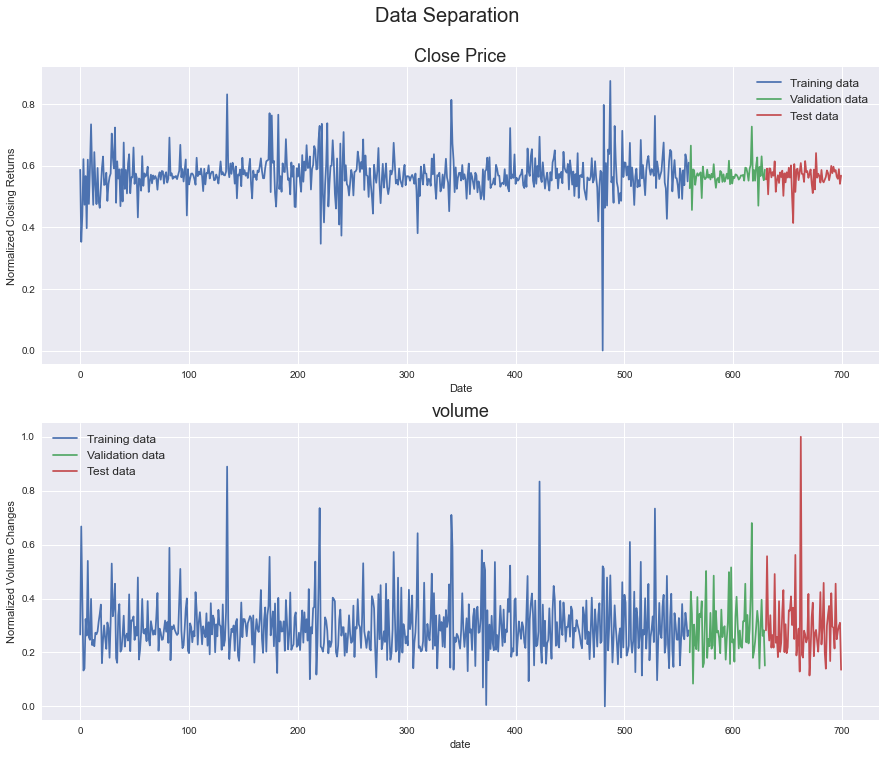

-------------------------------
Fitting model: 40 epochs
-------------------------------
Epoch 1/40
17/18 [===========================>..] - ETA: 0s - loss: 0.2725 - mae: 0.5172 - mape: 124976.0703
Epoch 00001: val_loss improved from inf to 0.19321, saving model to pctg_change.hdf5
18/18 [==============================] - 5s 263ms/step - loss: 0.2722 - mae: 0.5169 - mape: 124518.5625 - val_loss: 0.1932 - val_mae: 0.4384 - val_mape: 76.6734
Epoch 2/40
17/18 [===========================>..] - ETA: 0s - loss: 0.1204 - mae: 0.3339 - mape: 280687.5312
Epoch 00002: val_loss improved from 0.19321 to 0.02554, saving model to pctg_change.hdf5
18/18 [==============================] - 1s 71ms/step - loss: 0.1201 - mae: 0.3333 - mape: 279659.5000 - val_loss: 0.0255 - val_mae: 0.1565 - val_mape: 27.1799
Epoch 3/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0121 - mae: 0.0856 - mape: 1287085.8750
Epoch 00003: val_loss improved from 0.02554 to 0.00330, saving model to pctg_change.hdf5

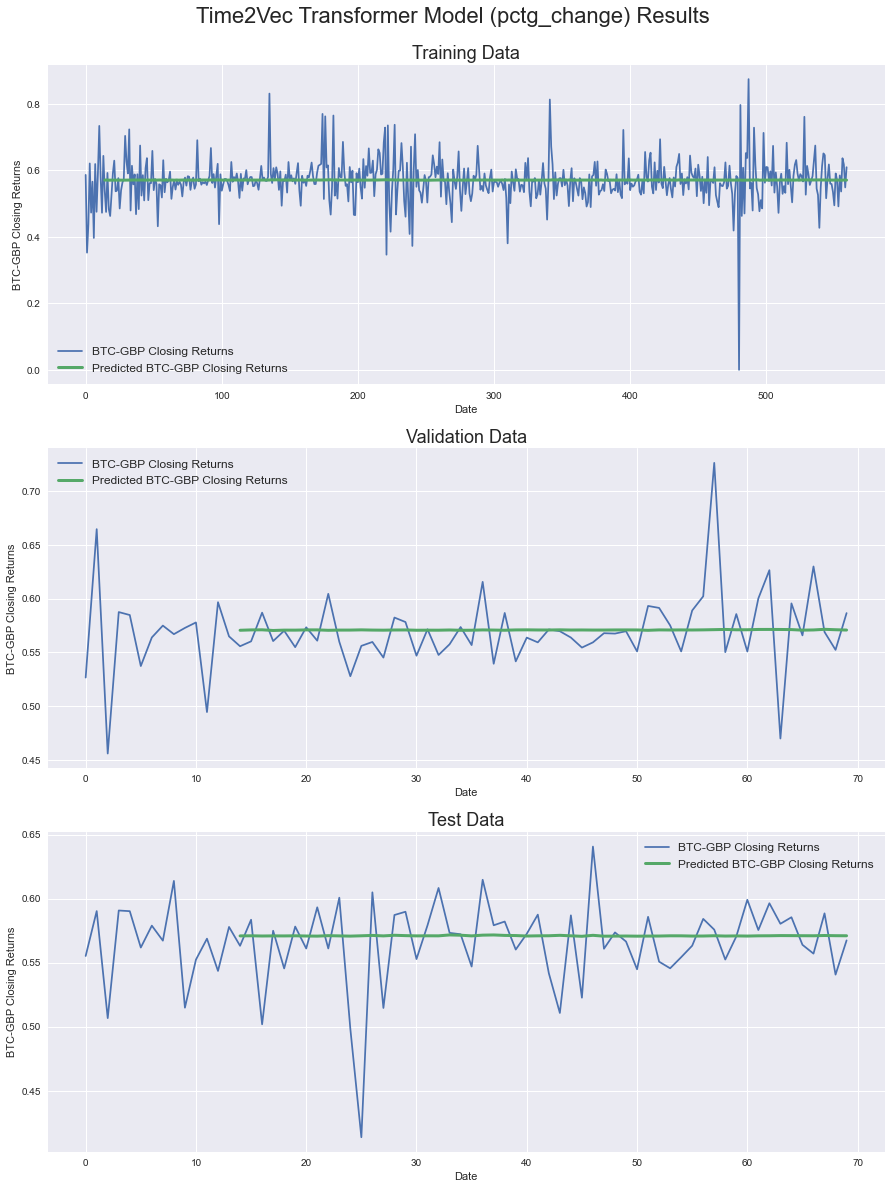

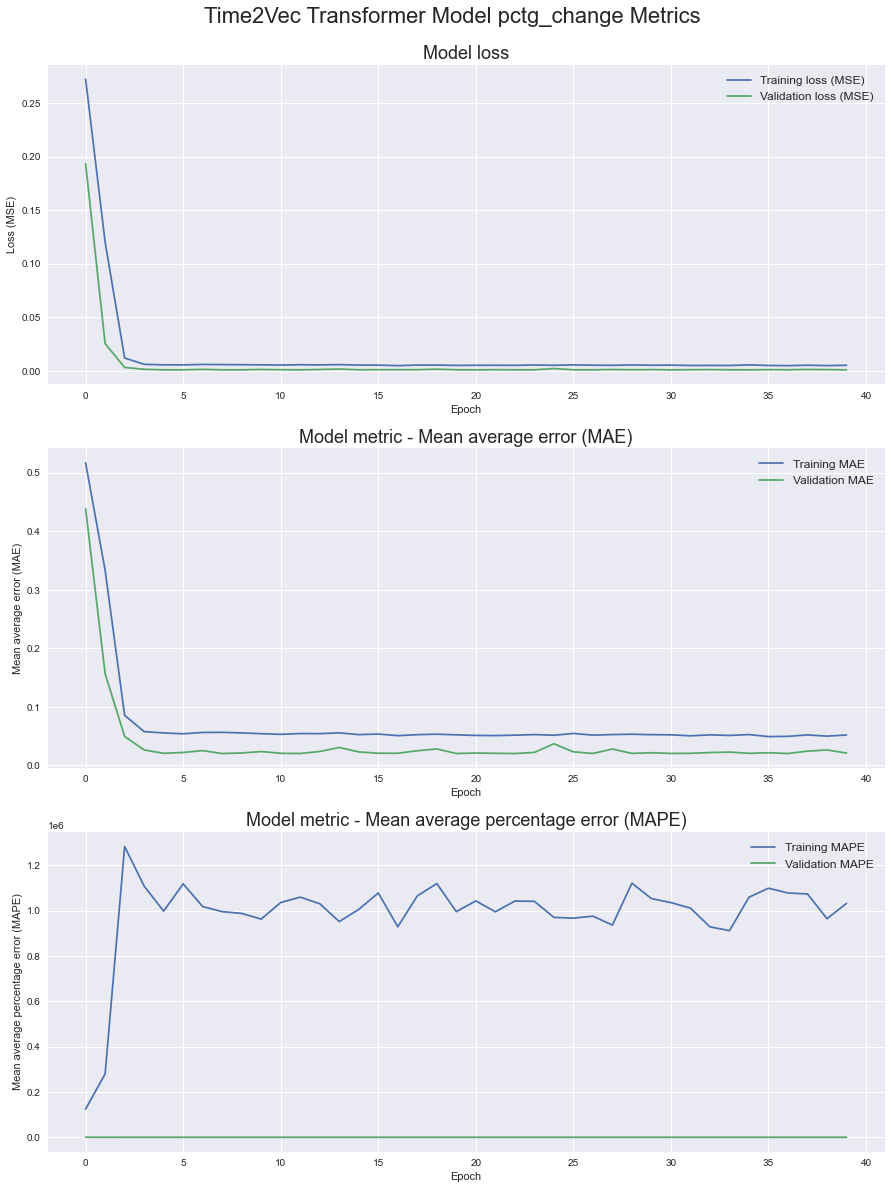

In [7]:
split_train_evalute_model(data,tvt,40,32)

# Step 2: Moving Average

Prepare a data set of percentage

## Moving Average - Reload data and apply rolling 7 day window

In [8]:
to_date = datetime.now()
from_date = to_date - relativedelta(days=700)

data = PreProcessing('BTC-GBP',download_finance_data(['BTC-GBP'],from_date,to_date))

In [9]:
data.apply_n_day_rolling_average(7)\
.calculate_normalised_percentage_change()

In [9]:
tvt = Time2VecTransformer('pctg_change_7d_ma',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector (Time2Vector)      (None, 14, 2)        56          input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 14, 7)        0           input_1[0][0]                    
                                                                 time2_vector[0][0]               
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 14, 7)        99114       concatenate[0][0]     

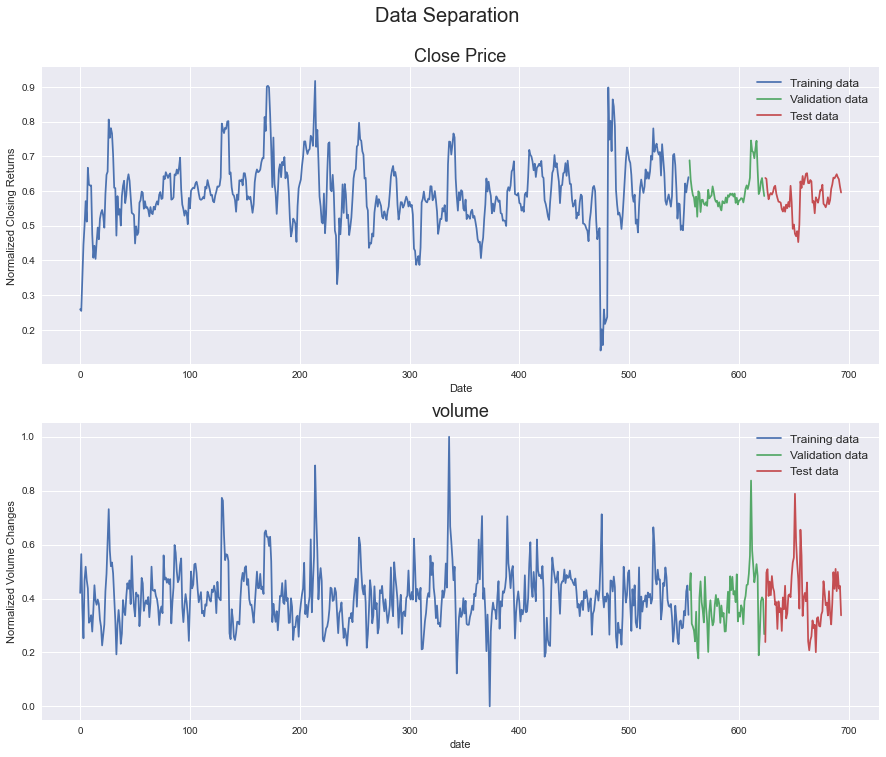

-------------------------------
Fitting model: 40 epochs
-------------------------------
Epoch 1/40
16/17 [===========================>..] - ETA: 0s - loss: 0.0117 - mae: 0.0819 - mape: 15.6640
Epoch 00001: val_loss improved from inf to 0.00318, saving model to pctg_change.hdf5
17/17 [==============================] - 1s 74ms/step - loss: 0.0119 - mae: 0.0826 - mape: 15.6424 - val_loss: 0.0032 - val_mae: 0.0342 - val_mape: 5.2173
Epoch 2/40
17/17 [==============================] - ETA: 0s - loss: 0.0119 - mae: 0.0816 - mape: 15.5748
Epoch 00002: val_loss improved from 0.00318 to 0.00275, saving model to pctg_change.hdf5
17/17 [==============================] - 1s 79ms/step - loss: 0.0119 - mae: 0.0816 - mape: 15.5748 - val_loss: 0.0027 - val_mae: 0.0314 - val_mape: 4.8051
Epoch 3/40
17/17 [==============================] - ETA: 0s - loss: 0.0108 - mae: 0.0782 - mape: 14.5770
Epoch 00003: val_loss did not improve from 0.00275
17/17 [==============================] - 1s 61ms/step - loss:

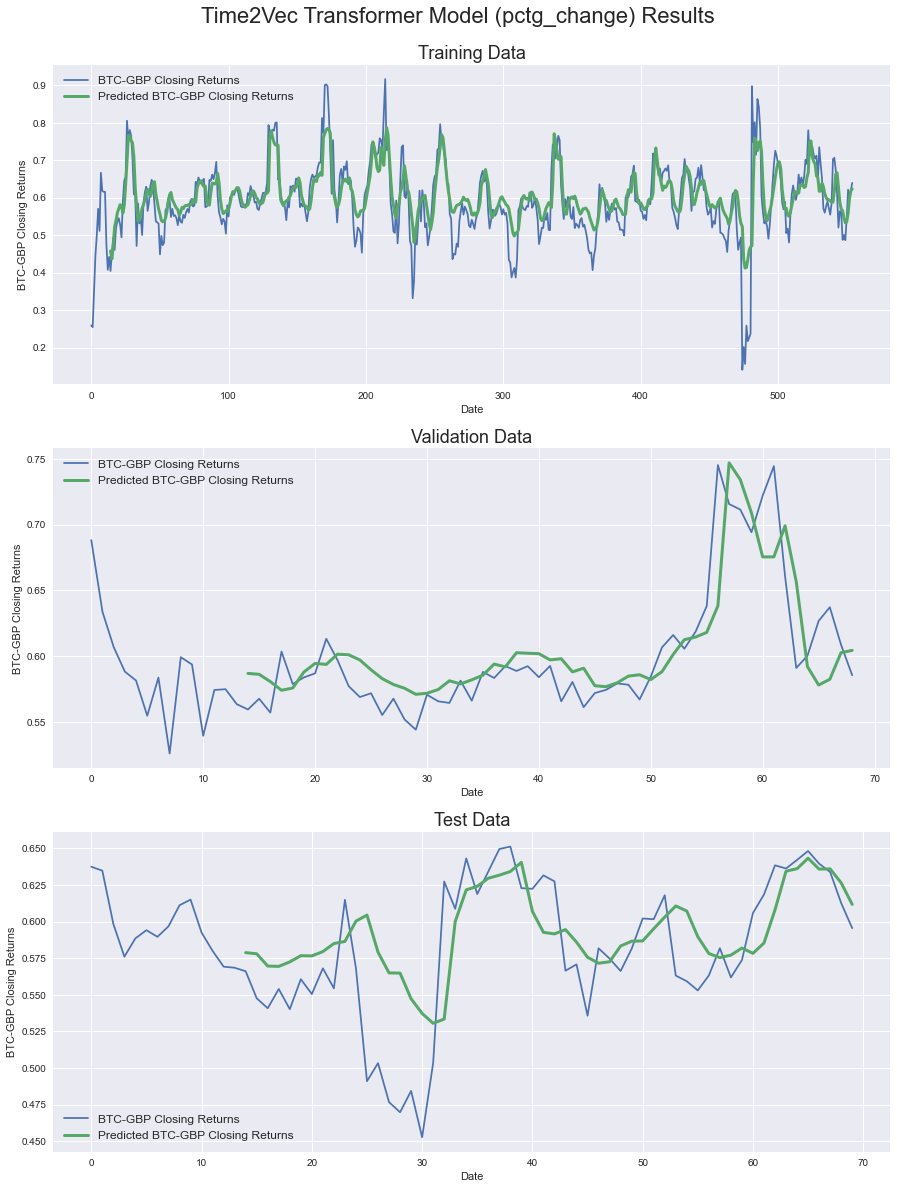

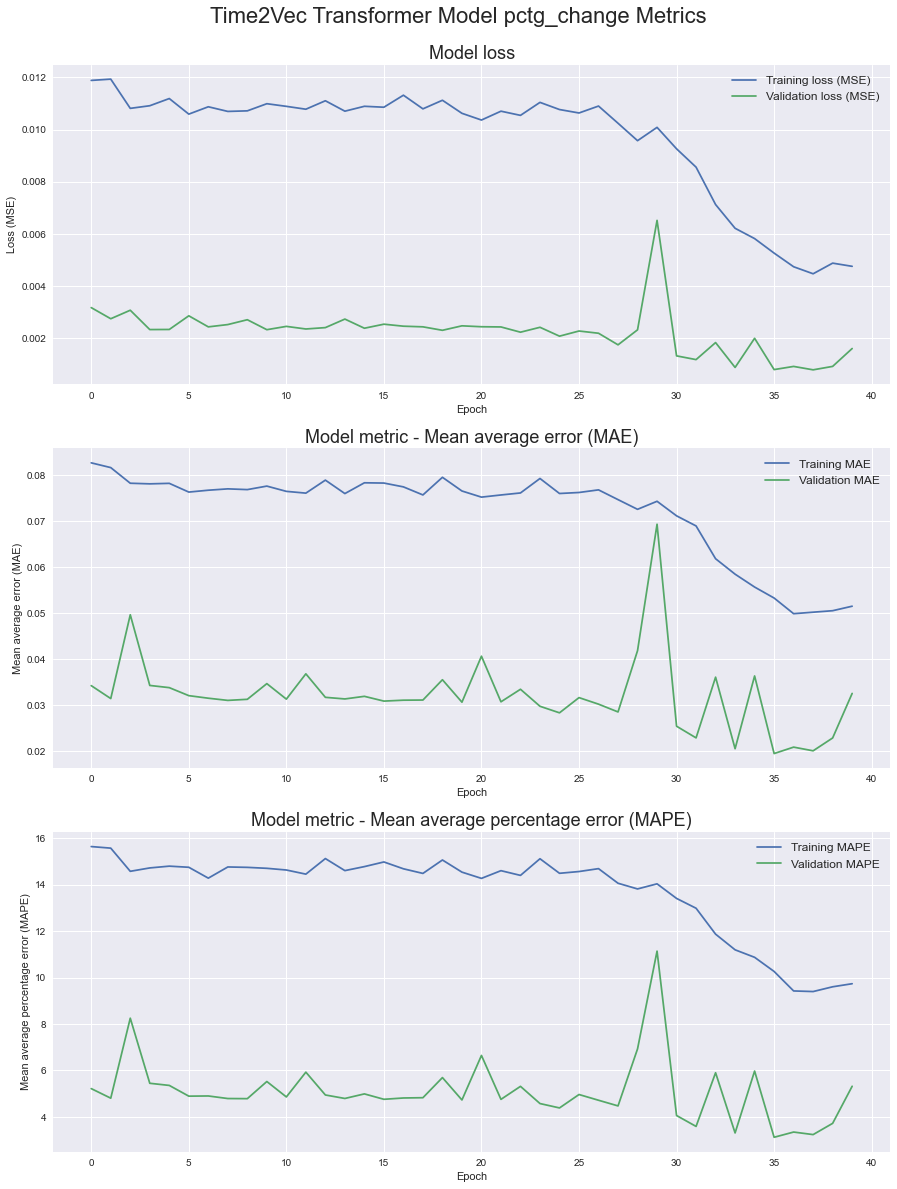

In [10]:
split_train_evalute_model(data,tvt,40,32)

# Step 3: Exponentially Weighted Moving Average

Trial a model using eqma feature 

In [11]:
to_date = datetime.now()
from_date = to_date - relativedelta(days=700)

data = PreProcessing('BTC-GBP',download_finance_data(['BTC-GBP'],from_date,to_date))

In [12]:
data.apply_n_day_exp_weighted_mean(7)\
.calculate_normalised_percentage_change()

In [12]:
tvt = Time2VecTransformer('pctg_change_7d_ewm',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector (Time2Vector)      (None, 14, 2)        56          input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 14, 7)        0           input_1[0][0]                    
                                                                 time2_vector[0][0]               
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 14, 7)        99114       concatenate[0][0]     

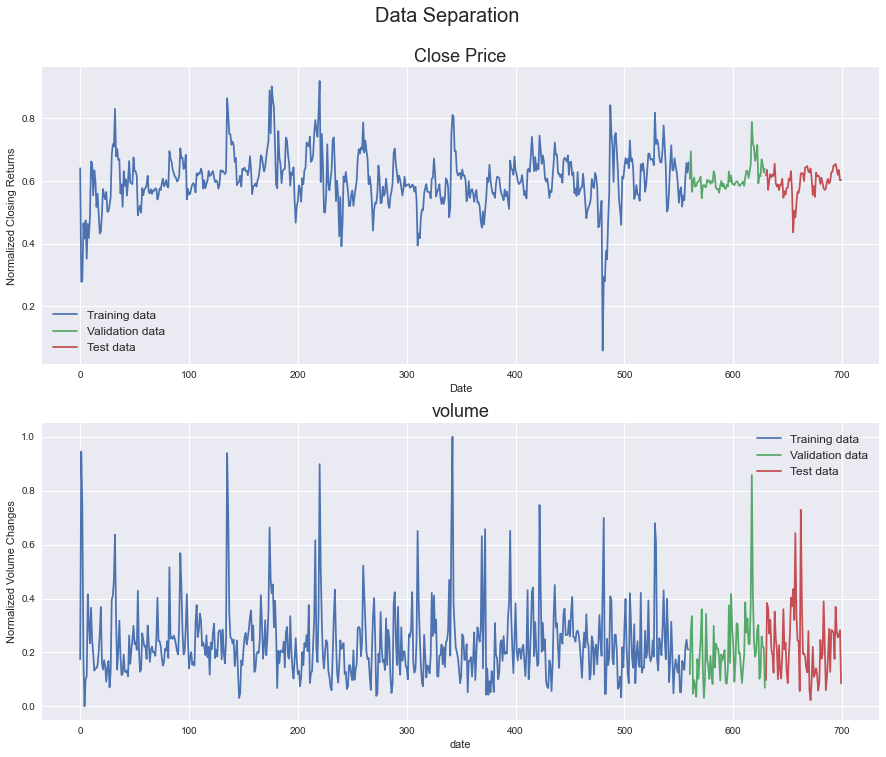

-------------------------------
Fitting model: 40 epochs
-------------------------------
Epoch 1/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0047 - mae: 0.0505 - mape: 9.7125
Epoch 00001: val_loss improved from inf to 0.00120, saving model to pctg_change.hdf5
18/18 [==============================] - 1s 71ms/step - loss: 0.0047 - mae: 0.0505 - mape: 9.6985 - val_loss: 0.0012 - val_mae: 0.0279 - val_mape: 4.5132
Epoch 2/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0043 - mae: 0.0474 - mape: 9.3809
Epoch 00002: val_loss improved from 0.00120 to 0.00103, saving model to pctg_change.hdf5
18/18 [==============================] - 1s 75ms/step - loss: 0.0043 - mae: 0.0475 - mape: 9.3863 - val_loss: 0.0010 - val_mae: 0.0212 - val_mape: 3.3059
Epoch 3/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0049 - mae: 0.0504 - mape: 9.6483
Epoch 00003: val_loss did not improve from 0.00103
18/18 [==============================] - 1s 58ms/step - loss: 0.00

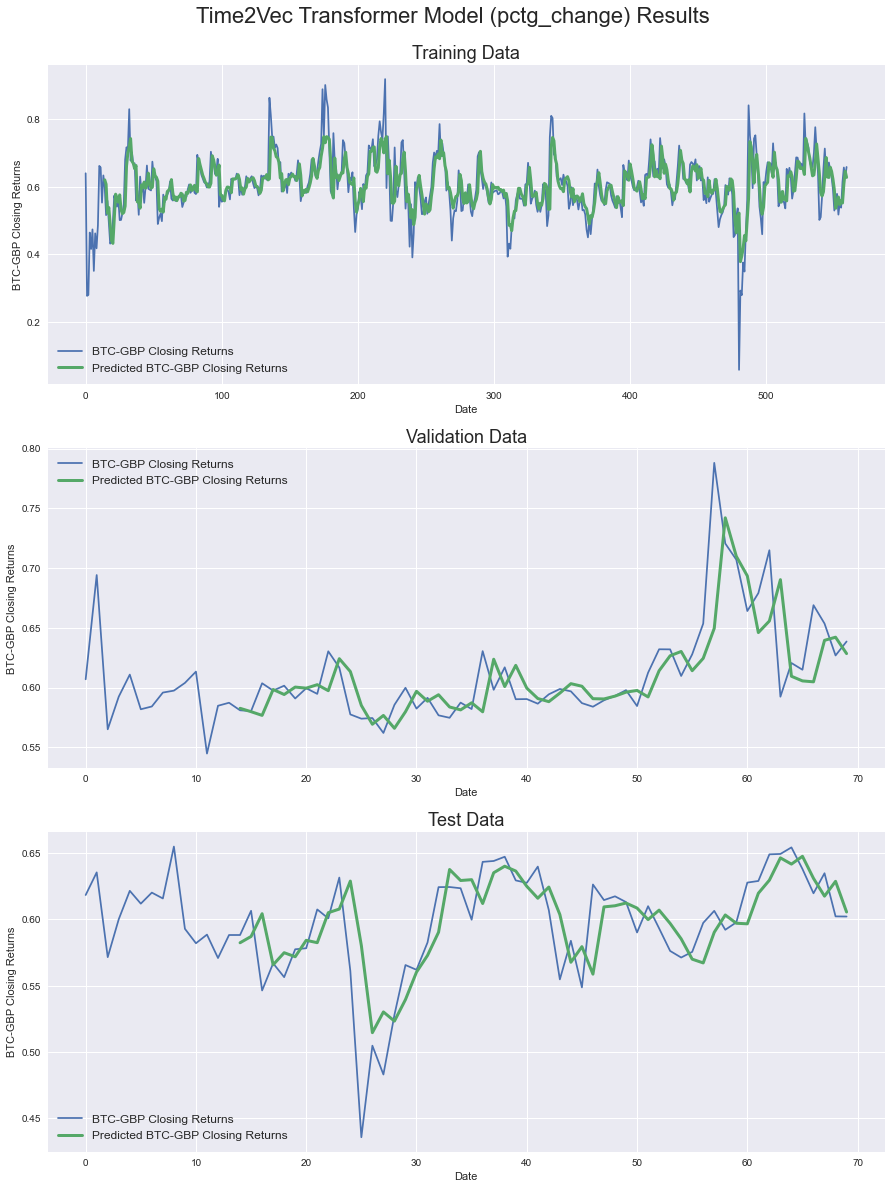

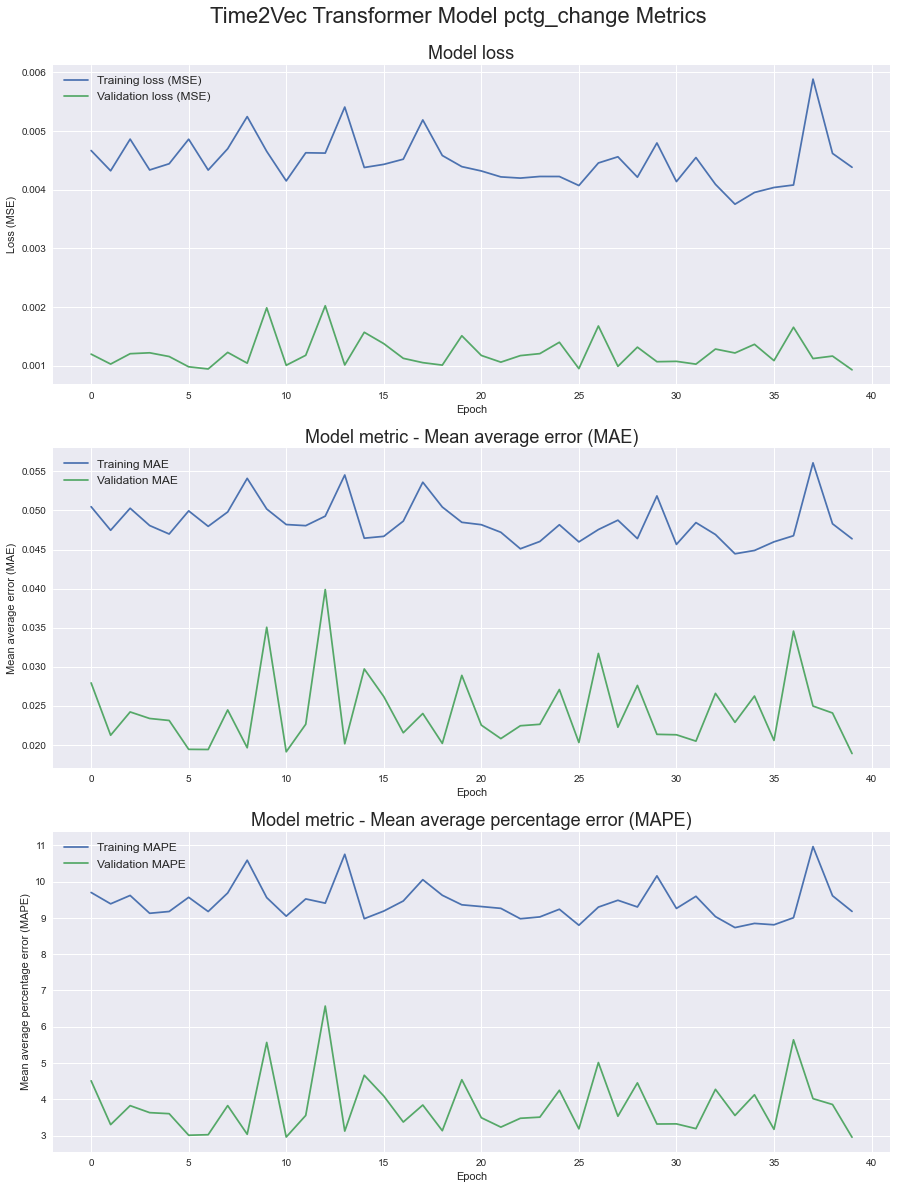

In [13]:
split_train_evalute_model(data,tvt,40,32)